In [1]:
#imports
import splat
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

/users/caganze/research/splat


Welcome to the Spex Prism Library Analysis Toolkit (SPLAT)!
If you make use of any features of this toolkit for your research, please remember to cite the SPLAT paper:

Burgasser et al. (2017, Astro. Soc. India Conf. Series 14, p. 7); Bibcode: 2017ASInC..14....7B

If you make use of any spectra or models in this toolkit, please remember to cite the original source.
Please report any errors are feature requests to our github page, https://github.com/aburgasser/splat/




In [2]:
#read in the binary file
data=pd.read_hdf('/volumes/LaCie/popsimsdata/spectral_templates_data_version_june20.h5',  key='binaries')
wave=pd.read_hdf('/volumes/LaCie/popsimsdata/spectral_templates_data_version_june20.h5',  key='wavegrid')

In [3]:
#pick one spectrum for sample
row= data.iloc[100]
system_type=row.system_type
#get the flux
flux= [row['flux_{}'.format(idx)] for idx in range(0, 441)]
#check that the wavelength and the flux have the same number of pixels
assert(len(flux) ==len(wave))

No handles with labels found to put in legend.


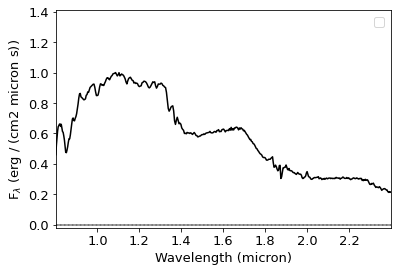

<Figure size 432x288 with 0 Axes>

In [4]:
#create a spectrum object
sp= splat.Spectrum(wave=np.array(wave.wavelength), flux=flux)
#visualize
_= sp.plot()

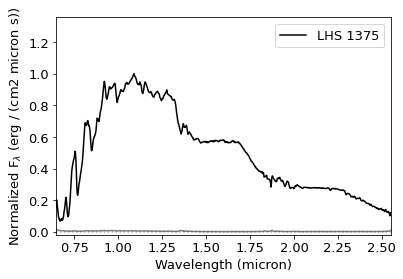

[<Figure size 432x288 with 1 Axes>]

<Figure size 432x288 with 0 Axes>

In [5]:
#obtain the standard spectrum from the system type
standard= splat.getStandard(system_type)
#normalize the standard 
standard.normalize()
#visualize
standard.plot()


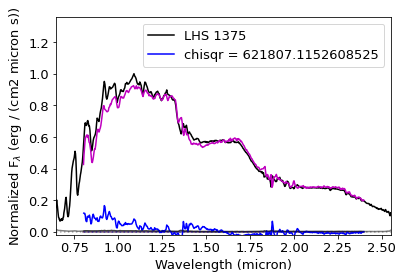

<Figure size 432x288 with 0 Axes>

In [10]:
#compute the chisq and scaling factor
#standard must the first argument, then the binary spectrum
chisq, scale= splat.compareSpectra(standard, sp,plot=True)

In [15]:
chisq, scale

(<Quantity 621807.11526085>, 0.9244866949804427)

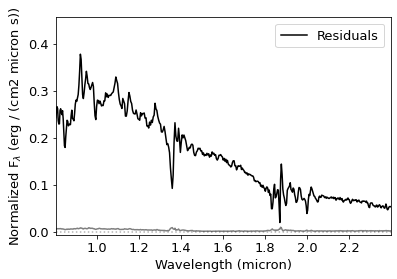

[<Figure size 432x288 with 1 Axes>]

<Figure size 432x288 with 0 Axes>

In [20]:
#then rescale the spectra 
sp.scale(scale)
#compute the difference
diff= standard-sp
diff.plot(label='Residuals')

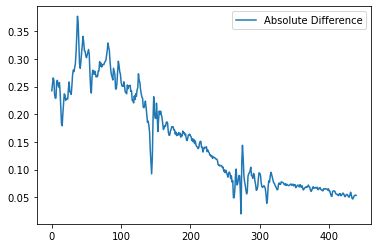

In [26]:
#we can look at the absolute value of the difference
# we will have to access the flux directly 
abs_flux_difference=np.abs(diff.flux)
fig, ax=plt.subplots()
ax.plot(abs_flux_difference, label='Absolute Difference')
ax.legend()